In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
import os
import glob
import matplotlib.pyplot as plt

In [2]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header=None)

In [3]:
df_wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
from sklearn.model_selection import train_test_split
X = df_wine.iloc[:,1:].values
y = df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=0)

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [6]:
# 最初は特徴量が13あるので13次元から共分散行列は設定される
cov_matrix = np.cov(X_train_std.T)
# np.linalg.eig()に分散共分散行列を渡すと固有値と固有ベクトルを返してくれる
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)
print('\nEigenvalues \n%s' % eigen_values)


Eigenvalues 
[4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


In [7]:
# 寄与率の計算
total_eigenvalues = sum(eigen_values)
variance_explain = [(i / total_eigenvalues) for i in sorted(eigen_values, reverse=True)]
cumsum_variance_explain = np.cumsum(variance_explain)

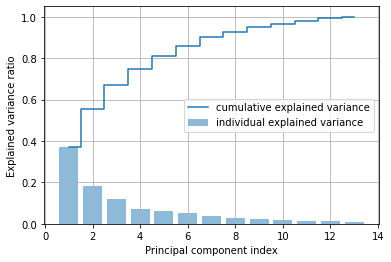

In [14]:
%matplotlib inline
# 寄与率のビジュアリゼーション
# barのheightにvariance_explain寄与率を指定することで棒グラフは寄与率を表す
plt.bar(range(1,14), variance_explain, alpha=0.5, align='center',
        label='individual explained variance')
# 積み上げ折れ線グラフを作る
# cumsum_variance_explainを指定して累積寄与率を示す
# 累積寄与率はすべてのサンプルの寄与率を合算して、
# その主成分が全体でどれだけの説明力があるかを示す。
# そうなると主成分得点に説得力がでる
plt.step(range(1,14), cumsum_variance_explain,where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.grid(b =True)
plt.show();